## 단순선형회귀

In [1]:
import numpy as np

In [3]:
# 농어들의 길이
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
      21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
      23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
      27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
      39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
      44.0])
# 농어들의 무게
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
      115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
      150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
      218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
      556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
      850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
      1000.0])

In [4]:
from sklearn.model_selection import train_test_split

# 데이터셋 나누기
train_input,test_input,train_target,test_target=train_test_split(perch_length,perch_weight,random_state=42)

In [11]:
# 레이블이 아닌 데이터셋들을 2차원 배열로 바꿔줌
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)
# (-1, 1)은 '열(column)차원의 정수에 따라 1개의 원소가 빠짐없이 배치될 수 있도록 행의 개수가 가변적으로 정해짐

shape함수 같은 경우에는 많이 사용하니까 지속적으로 사용하면서 익히는 것이 좋아보인다.

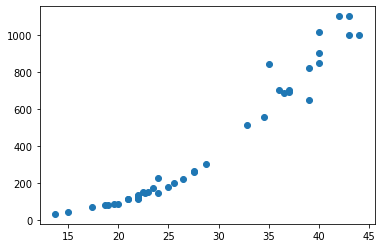

In [6]:
import matplotlib.pyplot as plt

# 훈련세트 산점도 그리기
plt.scatter(train_input,train_target)

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

#선형회귀 모델 훈련
lr.fit(train_input,train_target)

LinearRegression()

In [13]:
# 50cm인 농어에 대해 무게 예측하기
print(lr.predict([[50]]))

[1241.83860323]


In [14]:
# 선형회귀 모델이므로, lr 객체에 기울기(coefficient)와 절편(intercept) 속성이 저장되어 있다.
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535477


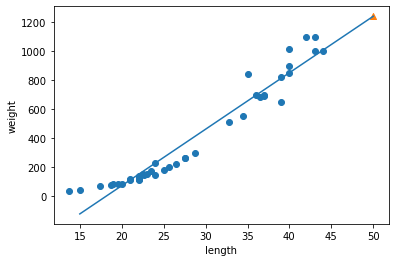

In [15]:
plt.scatter(train_input,train_target)

# x 축인 농어의 길이가 15에서 50인 것까지들을 기준으로 그래프를 그린다.
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])

# 50cm 농어를 예측한 데이터
plt.scatter(50,1241.8,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [16]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target)) 

0.939846333997604
0.8247503123313558


테스트 데이터의 점수가 훈련 데이터 점수에 비해 낮다. 일차곡선의 한계는 이를 크게 벗어나는 데이터의 경우 정확도가 떨어지며 조금 구부러진 곡선의 형태를 띄게하여 더 알맞은 예측을 하게끔 만들면 좋을 것 같다.

이를 위해 **제곱항**을 추가하여 **다항회귀(2차 함수 이상)** 형태를 만들어 주면 된다.

## 다항회귀

In [17]:
# 농어의 길이를 제곱한 것을 원래 데이터에 추가한 데이터 생성
train_poly=np.column_stack((train_input**2,train_input))
test_poly=np.column_stack((test_input**2,test_input))

np.column_stack은 벡터를 열벡터로 인식한 뒤, 열 방향(가로방향)으로 합쳐준다.

a = np.array((1,2,3))
b = np.array((2,3,4))
np.column_stack((a,b))

>array([[1, 2],
        [2, 3],
        [3, 4]])

이 말고도 hstack은 열 방향(가로방향)으로 합쳐준다.
vstack은 행 방향(세로방향)으로 합쳐준다.


In [18]:
# 데이터 확인
print(train_poly[:5])
print(test_poly[:5])
print(train_poly.shape)
print(test_poly.shape)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]
[[ 70.56   8.4 ]
 [324.    18.  ]
 [756.25  27.5 ]
 [453.69  21.3 ]
 [506.25  22.5 ]]
(42, 2)
(14, 2)


In [19]:
lr=LinearRegression()
lr.fit(train_poly,train_target)

print(lr.predict([[50**2,50]]))

[1573.98423528]


In [20]:
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


이때 다항 회귀 방정식은
  무게 = 1.01 x 길이<sup>2</sup> - 21.6 x 길이 +116.05

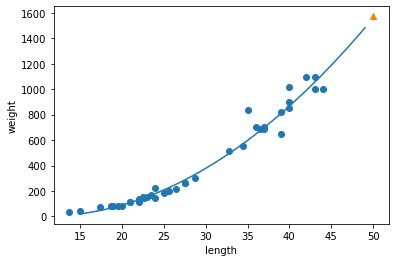

In [21]:
# 15~50 구간으로 그래프를 그리기 위한 정수 배열을 생성
point=np.arange(15,50)
# 훈련 세트의 산점도 그리기
plt.scatter(train_input,train_target)
# 회귀선 그리기
plt.plot(point,1.01*point**2-21.6*point+116.05)

# 50cm 농어를 예측한 데이터
plt.scatter(50,1574,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [42]:
print(f'훈련세트 스코어 : {lr.score(train_poly,train_target)}')
print(f'테스트세트 스코어 : {lr.score(test_poly,test_target)}') 

훈련세트 스코어 : 0.9900974417605036
테스트세트 스코어 : 0.9766805886149273


## 규제

머신러닝 모델이 훈련 데이터셋을 과도한 학습하여 오버피팅이 일어나는 것을 방지하는 것이다.
선형 회귀모델의 경우, 특성에 곱해지는 계수(기울기)의 크기를 작게 만드는 것이다.

In [24]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full[:10])
print(perch_full.shape) # 열의 개수 => 특성(feature) 개수

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]]
(56, 3)


위 데이터는 길이, 높이, 너비라는 3가지 특징으로 이루어져있어서 다중선형회귀를 구현할 수 있다.

In [25]:
import numpy as np
# 타깃 변수인 농어의 무게 데이터
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
    110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
    130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
    197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
    514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
    820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
    1000.0, 1000.0]
    )

In [30]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42, test_size=0.2)
print(train_input.shape[0], test_input.shape[0])

44 12


In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False) # include_bias는 절편을 만드는 것으로 test에 있는 코드 참조
# 어떤 식으로 변환이 되는지 확인하고자 샘플 데이터로 [[2, 3]]을 대입
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))
# poly.fit_trasform([[2,3]])

[[2. 3. 4. 6. 9.]]


In [33]:
#PolynomailFeatures() 를 적용하기 전의 데이터 형태
print("Not poly train data : {} / Not poly test data : {}".format(train_input.shape, test_input.shape))

poly = PolynomialFeatures(include_bias=False)

train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

#PolynomialFeatures() 를 적용한 후의 데이터 형태
print("Poly train data : {} / Poly test data : {}\n".format(train_poly.shape, test_poly.shape))

Not poly train data : (44, 3) / Not poly test data : (12, 3)
Poly train data : (44, 9) / Poly test data : (12, 9)



3가지 였던 특성이 9개의 특성으로 변형되었음을 알 수 있다.

In [34]:
#Polynomial data shape
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

***get_feature_names*** 라는 메소드 호출시 데이터가 어떤 식으로 변형되었는지도 확인할 수 있다. **x0 x1 x2**는 길이 높이 너비를 표현한 것이고 **degree**는 2로 자동 설정되어있어 **최대 2의 제곱**으로 변형되었다.

In [39]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

#훈련 데이터의 정확도
print(f'훈련데이터의 정확도 : {lr.score(train_poly, train_target)}' )
#테스트 데이터의 정확도
print(f'테스트 데이터의 정확도 : {lr.score(test_poly, test_target)}')

훈련데이터의 정확도 : 0.9900974417605036
테스트 데이터의 정확도 : 0.9766805886149273


**오버피팅 해결 전 스코어(정확도)**  
훈련세트 스코어 : 0.9900974417605036  
테스트세트 스코어 : 0.9766805886149273  

**오버피팅 해결 후 스코어(정확도)**  
훈련데이터의 스코어 : 0.9900974417605036  
테스트 데이터의 스코어 : 0.9766805886149273  

남은건 DEGREE(차수) 문제다. 차수를 적절히 높이면 100%에 가까운 모델을 만들 수 있을 것 같다.

In [43]:
poly = PolynomialFeatures(degree=5, include_bias=False)
train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

#최대 차수가 5인 데이터를 훈련시킨다.
lr.fit(train_poly, train_target)

#훈련 데이터의 정확도
print(lr.score(train_poly, train_target))
#테스트 데이터의 정확도
print(lr.score(test_poly, test_target))

0.9999999999147758
-167.24095186604714


우선 특성의 개수(degree)가 과도하게 많아져서 과대적합(Overfitting)이 이루어졌다.  

위와 같은 문제로 사이킷런은 선형회귀에서 이러한 상황을 해결하기 위해 규제 클래스를 제공해준다.

### 정규화

규제를 적용하기 전에 정규화를 해야하는데 그 이유는 각 계수들 값의 크기가 다르면, 규제 적용이 계수에 따라 다른 정도로 적용되기 때문이다.

In [47]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
# 훈련 데이터셋으로 정규화 학습
ss.fit(train_poly)
train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)

train_scaled

array([[-0.0479615 , -0.07964602, -0.35896578, ..., -0.5910714 ,
        -0.60804899, -0.62001131],
       [-0.13002895,  0.09842435,  0.19091661, ..., -0.38069718,
        -0.36855326, -0.3560834 ],
       [-1.03277088, -1.03410324, -1.03754405, ..., -0.75473951,
        -0.74961471, -0.74119993],
       ...,
       [-0.32933561, -0.52838337, -0.33556653, ..., -0.64509246,
        -0.63028045, -0.61267124],
       [ 1.59338748,  1.69393493,  1.20293421, ...,  1.50826805,
         1.24314217,  0.99961831],
       [ 0.71409339,  0.78933742,  0.9221432 , ...,  0.39979257,
         0.43347046,  0.46159204]])

StandardScaler 클래스를 임포트하여 전처리를 먼저 시켜준다. 이 데이터전처리(Preprocessing)를 하면 각 특징(Feature)의 범위가 다를 수도 있는 경우를 방지하여 정확도를 더 높일 수 있다.  

예를 들어, 생선의 길이는 20~50cm이지만, 생선의 너비는 2~6cm 정도 밖에 되지 않아서 각 데이터의 범위의 차이로 정확도가 떨어질 수 있는데, 표준점수로 변환하여 비슷한 범위 내에서 데이터를 처리하면 정확도를 높일 수 있다.

**fit()** **transform()** 메소드를 사용하여 표준점수로 변형시키면 된다.

## 릿지(Ridge) [L2규제]

In [45]:
from sklearn.linear_model import Ridge

#릿지
ridge = Ridge()
ridge.fit(train_scaled, train_target)

#훈련 데이터의 정확도
print(ridge.score(train_scaled, train_target))
#테스트 데이터의 정확도
print(ridge.score(test_scaled, test_target))

0.9896004835191297
0.9789200583251781


마이너스 였던 정확도가 97퍼센트까지 상승했고 L2규제를 통한 변수의 계수를 줄인 결과이다.  

이 Ridge() 클래스에는 alpha라는 매개변수를 통해 이를 조절할 수 있는 하이퍼 파라미터(Hyper Parameter)가 존재한다.
0.001~100 까지 값을 조절해가며, 최적의 alpha값을 찾아보도록한다.

In [48]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

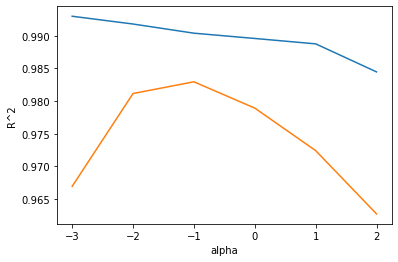

In [49]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

R^2는 결정계수라고 불리며 1에 가까울수록 정확도가 높다는 뜻으로 해석하면 된다.  

그래프에서는 alpha가 -1 (10^-1)일 때, 테스트 점수와 훈련 점수 차이가 적으면서, 결정계수까지 높으므로 이 모델에서 최적의 **alpha** 값은 1/10이라는 것을 알 수 있다.

## 라쏘(Lasso) [L1규제]

In [50]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9897812228260618
0.9800354016844836


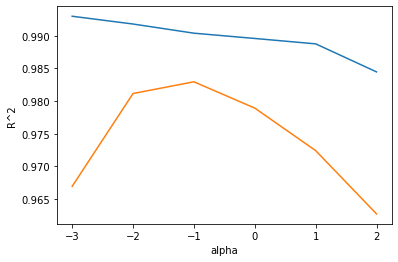

In [51]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

라쏘 또한 마찬가지로 alpha가 -1(1/10)일때, 가장 높은 점수를 기록하였다.  
라쏘는 계수를 0으로 만들어 과대적합(overfitting)이나 과소적합(Underfitting)을 해결한다. 몇개의 feaature의 계수를 0으로 만들었는지 확인해보겠다.

In [52]:
#사용되지 않는 특징의 개수
print(np.sum(lasso.coef_ == 0))

41


lasso 모델의 계수를 출력하는 coef_변수에서 계수가 0인 갯수를 합하는 것이다. 그렇게된 갯수가 41개라는 소리다